파이썬 머신러닝 완벽 가이드 개정 2판 8장 p488~508
### **[개념 정리+코드 필사]📝**

# **Chapter8. 텍스트분석**

### **01. 텍스트 분석 이해**

- NLP는 텍스트 분석을 향상하게 하는 기반 기술
- 텍스트 분석: 비정형 데이터인 텍스트를 분석. 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받기 때문에 비정형 텍스트 데이터를 피처 형태로 추출하고 값을 부여함
  - 피처 벡터화(피처 추출): 텍스트를 word기반 다수 피처로 추출하고 숫자 값을 부여하여 단어의 조합인 벡터값으로 표현하여 변환함. 머신러닝 모델링 전 꼭 수행해야하는 요소

- 텍스트 분석 수행 프로세스
  - 1. 텍스트 사전 준비작업(텍스트 전처리): 클렌징, 토큰화, 텍스트 정규화 등
    2. 피처 벡터화 / 추출: 피처 추출 후 벡터 값 할당. BOW 방법
    3. ML 모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터 세트로 ML모델 적용

    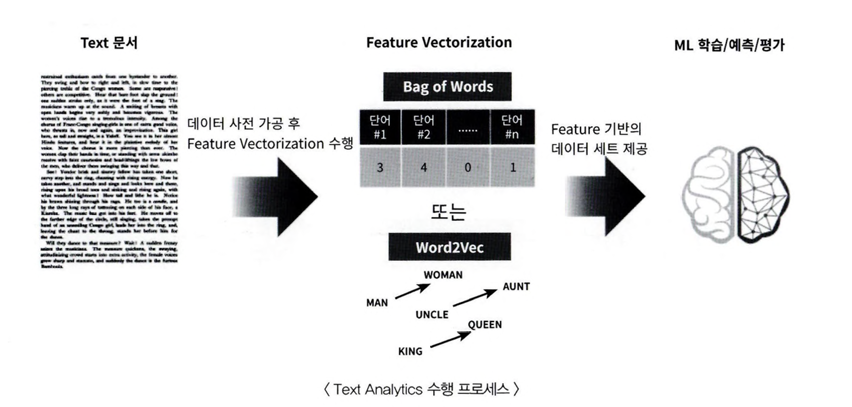

- 파이썬 기반의 NLP, 텍스트분석 패키지:
  - NLTK(대표 패키지. NLP의 거의 모든 영역 커버, 대량 데이터 기반 활용 아쉬움), Gensim(실제 업무, 토픽 모델링 분야), SpaCy(실제 업무, 최근 가장 주목)
  - 사이킷런: 머신러닝 위주라 NLP특화 라이브러리는 없음. 가공과 피처처리정도는 충분히 가능함. 보통 NLP전용 패키지(위)와 결합하여 작성




### **02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**

- 텍스트를 피처로 만들기 전, 가공하는 사전 준비 필요
- 텍스트 정규화: 클렌징, 정제, 토큰화, 어근화, 필터링/스톱워드 제거/철자수정, Stemming, Lemmatization 등 사전작업

(1) 클렌징✅: 분석에 방해가 되는 불필요한 문자, 기호 등을 사전 제거

(2) 텍스트 토큰화✅: 문장 토큰화, 단어 토큰화. NLTK에서 다양한 API 제공

- 🔖문장 토큰화: 문장의 마지막을 뜻하는 기호에 따라 분리함. 보통 NLTK의 sent_tokenize이용함(마침표, 개행 문자 등의 데이터 세트 다운로드 후 사용) -> 각각의 문장열로 구성된 list객체 반환
- 🔖단어 토큰화: 문장을 단어로 토큰화함. 구분자를 사용해 분리하거나 정규 표현식을 이용해 다양한 토큰화 가능. NLTK의 word_tokenize() -> 토큰화 된 단어 리스트로 반환
- 🔖n-gram: 단어별 토큰화시 문맥적 의미가 무시되므로 연속된 n개의 단어를 하나의 토큰 단위로 분리함.

(3) 스톱 워드 제거✅: 분석에 큰 의미가 없는 단어(문맥적 의미X)를 사전 제거함. 언어별로 목록화됨. 이를 필터링으로 제거하여 의미 있는 단어만 추출
  
(4) Stemming과 Lemmatization✅: 단어의 원형 찾기(시제, 비교급 등)
- 🔖Stemming: 철자가 훼손된 어근 단어 추출하는 경향. 단순함. NLTK의 Proter,Lancaster, Snowball Stemmer
- 🔖Lemmatization: Stemming보다 더 정교하며 의미론적인 원형을 찾음. 품사 같은 문법적 요소와 더 의미적인 부분을 감안하여 어근 찾음. 더 오랜시간. NLTK의 WordNetLemmatizer.단어의 품사를 입력해줘야함
      


In [2]:
# 문장 토큰화
from nltk import sent_tokenize
import nltk
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [4]:
# 단어 토큰화
from nltk import word_tokenize

sentence = "The Matix is eberywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matix', 'is', 'eberywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [5]:
# 문서의 모든 단어 토큰화(문장->단어)
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [ word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 분장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [6]:
# 스톱워드 제거

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print('영어 stop words 갯수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


- Stemming과 Lemmatization

In [9]:
# Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [10]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


### **03. Bag of Words - BOW**

- BOW: 문서의 모든 단어를 문맥이나 순서를 무시하고 빈도값으로만 피처 값 추출하는 모델.
- 1. 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열, 각 단어의 고유 인덱스 부여(0,1,2,...)
  2. 개별 문장마다 해당 단어가 나타나는 횟수를 각 단어에 기재

- 장점: 쉽고 빠른 구축
  
  단점: 문맥 의미 반영 부족(n_gram도 제한적), 희소 행렬 문제(행렬의 대부분이 0으로 채워지는 희소 행렬이 됨. ML 알고리즘의 성능을 저하시킴)

(1) BOW 피처 벡터화

- 피처 벡터화: 텍스트를 특정 의미를 가지는 숫자 벡터로 변환. 예를 들어 발생 빈도 값으로 벡터 변환. 피처 추출에 포함되는 개념
- BOW에서 피처 벡터화: 모든 문서에서 모든 단어를 칼럼 형태로 나열, 각 문서의 해당 단어 횟수나 빈도를 값으로 부여하는 데이터 세트 모델로 변경함. M개의 문서+N개의 단어->M X N 행렬
  - 카운트 기반 벡터화: 해당 단어가 나타나는 횟수를 값으로 부여하는 방식
  - TF-IDF: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티 부여(범용적 단어)-> 가중치의 균형을 맞추어 더 좋은 예측 성능 보장
  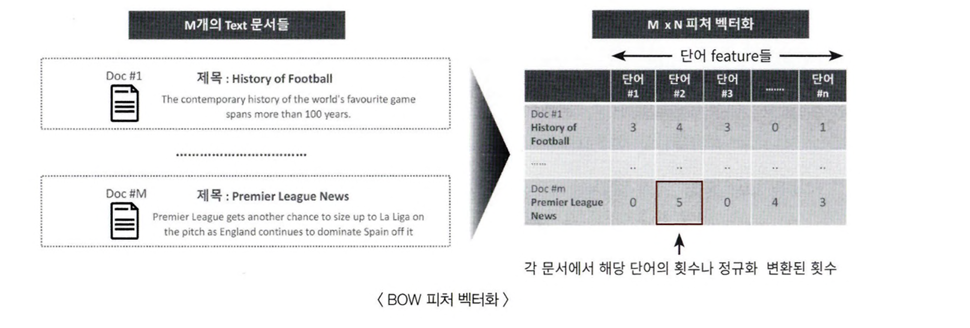

  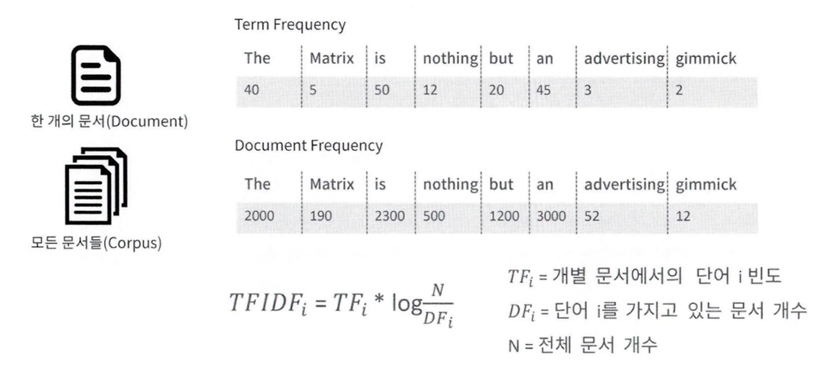


(2) 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

- 사이킷런의 📃CountVectorizer: 카운트 기반 벡터화 구현. 텍스트 전처리도 함께 수행함. fit(), transform()으로 객체 반환. 입력 파라미터들⏬
      - max_df: 너무 높은 빈도수의 단어 피처 제외하기 위함. 이하로 나타나는 단어만 추출
      - min_df: 너무 낮은 빈도수도 가비지성 단어이므로 추출X
      - max_features: 추출하는 피터 개수를 제한함
      - stop_words: 설정 언어의 스톱워드 단어 제외
      - n_gram_range: n_gram범위 설정해 순서 보강
      - analyzer: 피처추출 수행 단위 지정. 디폴트는 단어추출
      - tocken_pattern: 토큰화 정규 표현식 패턴 지정
      - tokenizer: 별도의 커스텀 함수 이용시 적용
  - 1. 전처리 2. (디폴트)단어 기준 n_gram_range반영 토큰화 3. 토큰 정규화 수행 4. 파라미터 이용해 피처 벡터화

- 사이킷런의 📃TfidfVectorizer: TF-IDF 벡터화. 방법은 동일함

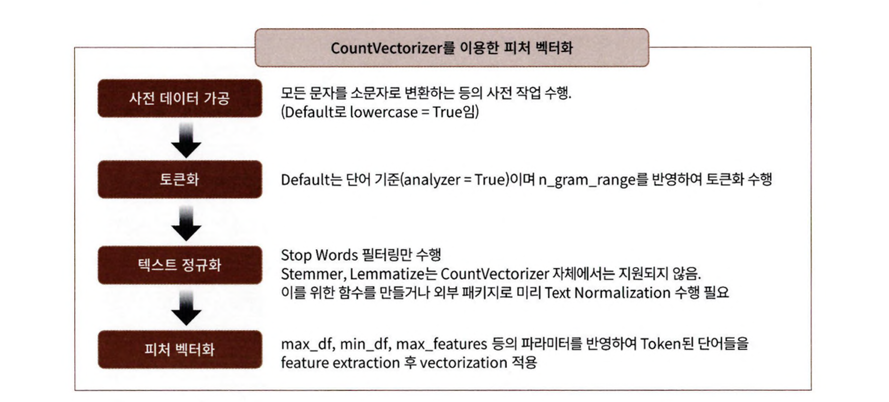

(3) BOW 벡터화를 위한 희소 행렬

- 텍스트 피처 벡터화하여 변환하면 CSR 형태의 희소 행렬 반환함. 모든 단어를 중복 제거하고 피처로 만들면 대규모 행렬이 생성되고 대부분의 값은 0을 차지하는 희소 행렬이됨
- 불필요한 0값들 때문에 메모리 공간이 많이 필요함 -> 적은 메모리 공간을 쓰도록 변환: COO, CSR방식

(4) 희소 행렬 - COO 형식

- 0이 아닌 데이터만 별도의 데이터 배열(array)에 저장하고, 그 데이터가 저장된 행과 열의 위치를 별도의 배열로 저장함.
- scipy의 📃sparse.coo_matrix(0이 아닌 데이터 배열, (행위치 배열, 열 위치 배열)): 밀집 행렬을 COO형식의 희소 행렬로 변환
- toarray()로 다시 밀집행렬로 출력 가능

(5) 희소 행렬 - CSR 형식

- COO형식이 행과 열의 위치를 나타내기 위해 반복적 위치 데이터를 사용하는 문제를 보완함. 행 위치 배열은 순차적으로 증가하는 값이므로 고유값의 시작 위치만 표기해 반복을 제거함(위치의 위치를 표기)
- 행 위치 배열 내 고유 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식
- COO보다 메모리가 적게 들고 빠른 연산 가능함
- scipy의 📃sparse.csr_matrix((0아닌 배열, 열위치배열, 행위치 배열의 고유값 시작위치 배열))

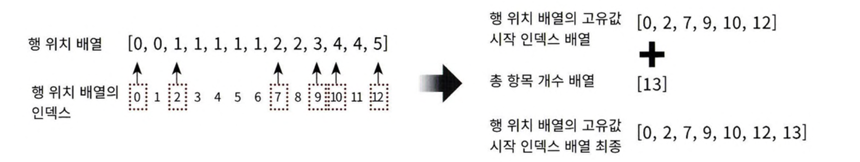




In [11]:
# 희소 행렬 - COO

import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

In [14]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [15]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [20]:
# 희소행렬 - CRS

from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CRS 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [21]:
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)